In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
data_dir = pathlib.Path("fashion")
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir / "train",
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    label_mode="int")

test_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir / "test",
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32,
    label_mode="int")

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [3]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), 
    layers.Dense(128, activation='relu'),  
    layers.Dense(64, activation='relu'),   
    layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 577s 305ms/step - accuracy: 0.7762 - loss: 0.6395 - val_accuracy: 0.8455 - val_loss: 0.4271
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 98ms/step - accuracy: 0.8599 - loss: 0.3864 - val_accuracy: 0.8613 - val_loss: 0.3838
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 109ms/step - accuracy: 0.8764 - loss: 0.3383 - val_accuracy: 0.8638 - val_loss: 0.3693
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 209s 111ms/step - accuracy: 0.8840 - loss: 0.3142 - val_accuracy: 0.8575 - val_loss: 0.3880
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 228s 122ms/step - accuracy: 0.8897 - loss: 0.2974 - val_accuracy: 0.8616 - val_loss: 0.3708
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 270s 144ms/step - accuracy: 0.8968 - loss: 0.2774 - val_accuracy: 0.8490 - val_loss: 0.4174
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 281s 150ms/step - accuracy: 0.8991 - loss: 0.2675 - val_accuracy: 0.8633 - val_loss: 0.3763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 234s 124ms/step - acc

In [8]:
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0 
    img_array = np.expand_dims(img_array, axis=0) 
    prediction = model.predict(img_array)
    return np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


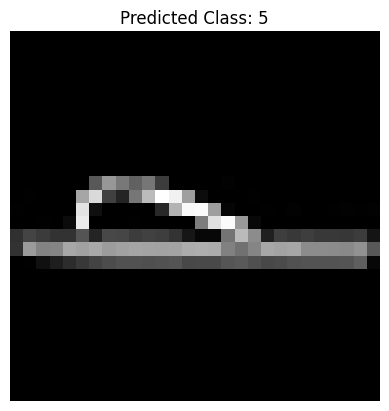

In [9]:
sample_image_path = "fashion/test/5/1037.png" 
predicted_class = predict_image(sample_image_path)

plt.imshow(keras.preprocessing.image.load_img(sample_image_path, color_mode="grayscale"), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


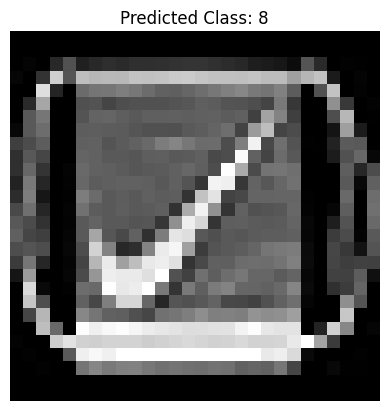

In [10]:
sample_image_path = "fashion/test/8/1094.png" 
predicted_class = predict_image(sample_image_path)

plt.imshow(keras.preprocessing.image.load_img(sample_image_path, color_mode="grayscale"), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()